In [1]:
%matplotlib inline
import os
import numpy as np
import flopy

In [2]:
ml = flopy.modflow.Modflow.load('freyberg.nam', version='mf2005', verbose=True, model_ws='data')


Creating new model with name: freyberg
--------------------------------------------------

Parsing the namefile --> data/freyberg.nam
Setting filehandles:

--------------------------------------------------
External unit dictionary:
{51: <flopy.utils.mfreadnam.NamData object at 0x107d80790>, 2: <flopy.utils.mfreadnam.NamData object at 0x107d805d0>, 11: <flopy.utils.mfreadnam.NamData object at 0x107d80610>, 13: <flopy.utils.mfreadnam.NamData object at 0x107d80410>, 14: <flopy.utils.mfreadnam.NamData object at 0x107d80750>, 15: <flopy.utils.mfreadnam.NamData object at 0x107d804d0>, 18: <flopy.utils.mfreadnam.NamData object at 0x107d80690>, 19: <flopy.utils.mfreadnam.NamData object at 0x107d806d0>, 20: <flopy.utils.mfreadnam.NamData object at 0x107d80650>, 53: <flopy.utils.mfreadnam.NamData object at 0x107d80810>, 52: <flopy.utils.mfreadnam.NamData object at 0x107d807d0>, 27: <flopy.utils.mfreadnam.NamData object at 0x107d80710>}
--------------------------------------------------

loadin


Plotting Packages
plotting DIS package util_2d instance: top
plotting DIS package util_3d instance: _ModflowDis__thickness
plotting DIS package util_3d instance: botm
plotting BAS6 package util_3d instance: ibound
plotting BAS6 package util_3d instance: strt
plotting LPF package util_3d instance: wetdry
plotting LPF package util_3d instance: vka
plotting LPF package util_3d instance: hani
plotting LPF package util_3d instance: vkcb
plotting LPF package util_3d instance: hk
plotting LPF package util_3d instance: sy
plotting LPF package util_3d instance: ss
plotting RIV package mflist instance: stress_period_data
plotting RCH package transient_2d instance: rech
plotting WEL package mflist instance: stress_period_data
 


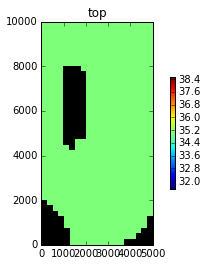

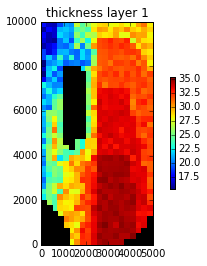

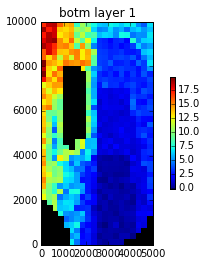

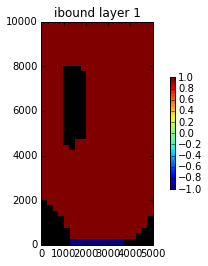

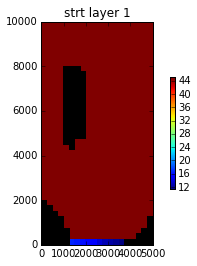

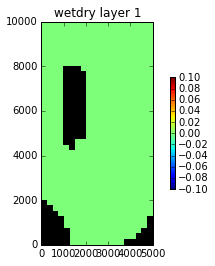

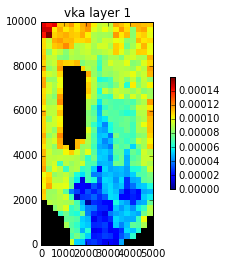

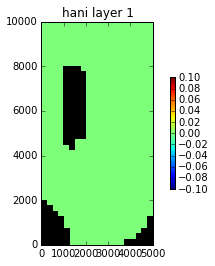

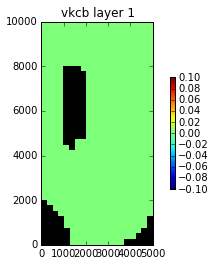

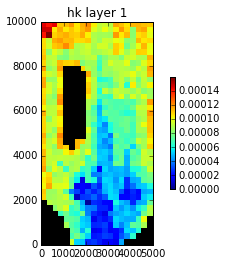

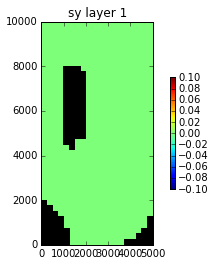

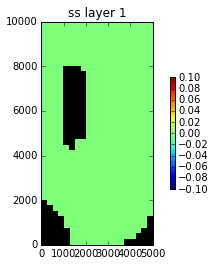

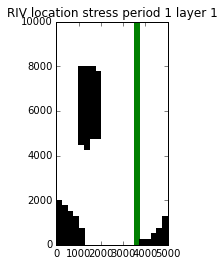

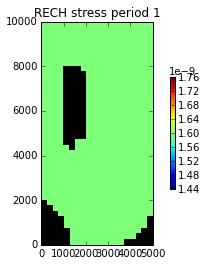

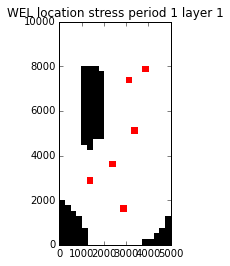

In [3]:
ml.plot();

plotting DIS package util_2d instance: top
plotting DIS package util_3d instance: _ModflowDis__thickness
plotting DIS package util_3d instance: botm


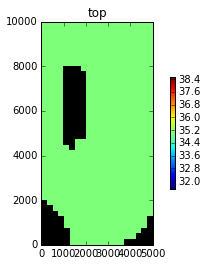

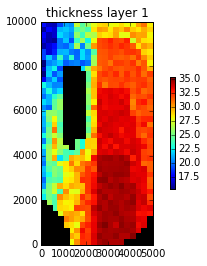

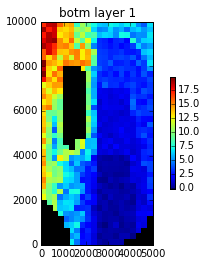

In [4]:
ml.dis.plot();

In [5]:
fb = os.path.join('data', 'ml.lpf')
ml.dis.plot(filename_base=fb);

plotting DIS package util_2d instance: top
    created...ml.lpf_top.png
plotting DIS package util_3d instance: _ModflowDis__thickness
    created...ml.lpf_thickness_Layer1.png
plotting DIS package util_3d instance: botm
    created...ml.lpf_botm_Layer1.png


In [6]:
fb = os.path.join('data', 'ml')
ml.plot(filename_base=fb);


Plotting Packages
plotting DIS package util_2d instance: top
    created...ml_top.png
plotting DIS package util_3d instance: _ModflowDis__thickness
    created...ml_thickness_Layer1.png
plotting DIS package util_3d instance: botm
    created...ml_botm_Layer1.png
plotting BAS6 package util_3d instance: ibound
    created...ml_ibound_Layer1.png
plotting BAS6 package util_3d instance: strt
    created...ml_strt_Layer1.png
plotting LPF package util_3d instance: wetdry
    created...ml_wetdry_Layer1.png
plotting LPF package util_3d instance: vka
    created...ml_vka_Layer1.png
plotting LPF package util_3d instance: hani
    created...ml_hani_Layer1.png
plotting LPF package util_3d instance: vkcb
    created...ml_vkcb_Layer1.png
plotting LPF package util_3d instance: hk
    created...ml_hk_Layer1.png
plotting LPF package util_3d instance: sy
    created...ml_sy_Layer1.png
plotting LPF package util_3d instance: ss
    created...ml_ss_Layer1.png
plotting RIV package mflist instance: stress_pe

In [7]:
fb = os.path.join('data', 'ml.wel')
ml.wel.plot(filename_base=fb);

plotting WEL package mflist instance: stress_period_data
    created...ml.wel_WEL_StressPeriod1_Layer1.png


In [8]:
ml.oc.compact = True
ml.oc.write_file()

In [9]:
ml.exe_name = 'mf2005'
ml.run_model()

FloPy is using the following executable to run the model: /Users/jdhughes/Documents/Development/bin/mac/mf2005

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 x/x/2015                        

 Using NAME file: freyberg.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2015/10/16 14:53:34

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2015/10/16 14:53:34
 Elapsed run time:  0.020 Seconds

  Normal termination of simulation


[True, []]

In [10]:
bobj = flopy.utils.CellBudgetFile(os.path.join('data', 'freyberg.cbc'))
bobj.list_records()

(1, 1, '   CONSTANT HEAD', 20, 40, -1, 2, 10.0, 10.0, 10.0)
(1, 1, 'FLOW RIGHT FACE ', 20, 40, -1, 1, 10.0, 10.0, 10.0)
(1, 1, 'FLOW FRONT FACE ', 20, 40, -1, 1, 10.0, 10.0, 10.0)
(1, 1, '           WELLS', 20, 40, -1, 5, 10.0, 10.0, 10.0)
(1, 1, '   RIVER LEAKAGE', 20, 40, -1, 5, 10.0, 10.0, 10.0)
(1, 1, '        RECHARGE', 20, 40, -1, 3, 10.0, 10.0, 10.0)


In [11]:
times = bobj.get_times()
print(times)

[10.0]


In [12]:
kk = bobj.get_kstpkper()
print(kk)

[(0, 0)]


In [13]:
bi = bobj.get_data(kstpkper=kk[0], text='river leakage')[0]
print(bi.dtype)

[('node', '<i4'), ('q', '<f4')]


In [14]:
print(bi['node'])

[ 15  35  55  75  95 115 135 155 175 195 215 235 255 275 295 315 335 355
 375 395 415 435 455 475 495 515 535 555 575 595 615 635 655 675 695 715
 735 755 775 795]


In [15]:
print(bi.node)

[ 15  35  55  75  95 115 135 155 175 195 215 235 255 275 295 315 335 355
 375 395 415 435 455 475 495 515 535 555 575 595 615 635 655 675 695 715
 735 755 775 795]


In [17]:
print(bi.q.sum())

-0.0427154
